In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
train= pd.read_csv(r"C:\Users\Nikita\Downloads\Train_RiskScore.csv")

In [4]:
train

,ID,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0


#### to zoom in and zoom out use ctrl shift +or - accordingly 

In [5]:
train.drop(['ID'], axis = 1, inplace = True) 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [7]:
# in eduactionn the data is written in numerical form but it is actually in categorical form with dummies created already 

In [8]:
train.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [9]:
train.dtypes.value_counts()

int64      6
float64    3
dtype: int64

# EDA

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,700.0,34.860000,7.997342,20.000000,29.000000,34.000000,40.000000,56.00000
ed,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,2.000000,5.00000
employ,700.0,8.388571,6.658039,0.000000,3.000000,7.000000,12.000000,31.00000
address,700.0,8.278571,6.824877,0.000000,3.000000,7.000000,12.000000,34.00000
income,700.0,45.601429,36.814226,14.000000,24.000000,34.000000,55.000000,446.00000
debtinc,700.0,10.260571,6.827234,0.400000,5.000000,8.600000,14.125000,41.30000
creddebt,700.0,1.553553,2.117197,0.011696,0.369059,0.854869,1.901955,20.56131
othdebt,700.0,3.058209,3.287555,0.045584,1.044178,1.987567,3.923065,27.03360
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.00000


<AxesSubplot:>

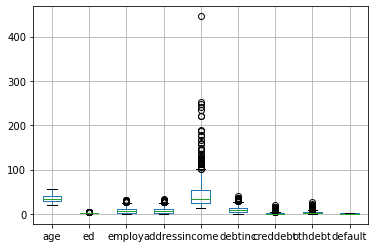

In [11]:
train.boxplot()

<AxesSubplot:>

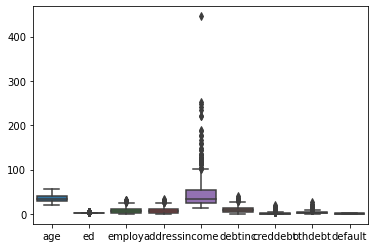

In [12]:
sns.boxplot(data = train)

In [13]:
def outlier_capping (x):
    x = x.clip(upper = x.quantile(0.99))

    x = x.clip(lower = x.quantile(0.01))
    return x 

In [14]:
cleaned_data = train.apply(outlier_capping)

<function matplotlib.pyplot.show(close=None, block=None)>

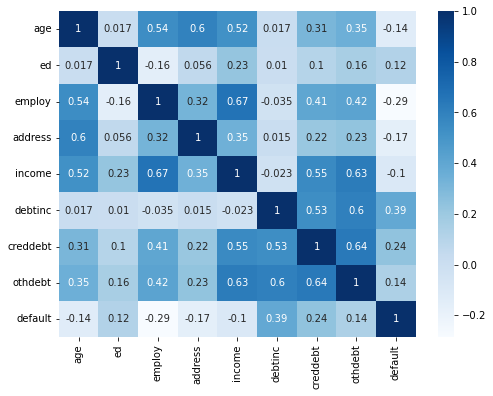

In [15]:
correlation_mat = cleaned_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_mat,annot=True, cmap = "Blues") #cr = correlation that we calculated above 
plt.show

In [16]:
cleaned_data['default'].value_counts(normalize = True)  #null accuracy of 0 is 73% i.e. it percentage 
# if null accuracy ratio is tilted towards 0 or 1 then it is called inbalance data / class problem 
# any class ratio less than 25%  is under inbalance 

0    0.738571
1    0.261429
Name: default, dtype: float64

In [17]:
y = cleaned_data['default'] 
x = cleaned_data.drop(["default"],axis=1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=9) 

In [20]:
y_train.value_counts(normalize= True)

0    0.735238
1    0.264762
Name: default, dtype: float64

In [21]:
y_test.value_counts(normalize = True)

0    0.748571
1    0.251429
Name: default, dtype: float64

In [22]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [23]:
log = LogisticRegression(max_iter=10000)
log.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

# Model Evaluation

In [24]:
print(f"Training Score:{log.score(x_train,y_train)}")
print(f"Testing Score:{log.score(x_test,y_test)}")


Training Score:0.8076190476190476
Testing Score:0.8114285714285714


#### where train result is less than test then it is under fit 

overfit then model is quit complex  make it simple 
and if it is underfit then model is quite simple make it complex 

In [25]:
pred_train = log.predict(x_train) # because we have actual value not predicited and we do confusion matrix on basis of predcited and actual value 

In [26]:
pred_test = log.predict(x_test)

In [27]:
log.predict_proba(x_train)[:,1]    # probability of 1 

array([3.87865106e-03, 4.11662220e-01, 4.40426720e-02, 5.48832986e-01,
       3.18034749e-01, 1.40959844e-02, 4.33990917e-01, 5.72794427e-02,
       1.60363565e-01, 5.32664151e-01, 9.82532208e-02, 2.34824184e-03,
       7.74981320e-01, 1.16286750e-01, 6.80672507e-01, 1.20200968e-01,
       4.91879927e-02, 2.22413028e-01, 3.67970290e-01, 3.40851034e-02,
       3.93043147e-01, 7.23277049e-01, 5.52123030e-01, 8.03943551e-01,
       3.53793218e-01, 8.30933641e-03, 5.86747810e-01, 1.41136469e-03,
       2.93544642e-01, 2.98926385e-01, 6.65917166e-01, 7.62200468e-01,
       6.55495126e-02, 2.41384968e-03, 1.61555334e-02, 5.37971076e-02,
       1.93933253e-02, 3.42261783e-01, 2.90397412e-01, 1.56027545e-01,
       3.43945791e-02, 2.51872865e-01, 3.92109443e-01, 4.83978794e-01,
       3.72068329e-01, 6.40476189e-03, 5.42377823e-01, 4.00439217e-01,
       4.72877865e-01, 2.32902775e-01, 3.31819672e-01, 1.42353255e-01,
       3.35399461e-01, 1.10341881e-02, 5.62305240e-01, 1.12574292e-01,
      

In [28]:
y_train

342    0
620    0
178    0
123    1
582    0
      ..
56     0
501    1
638    0
348    0
382    1
Name: default, Length: 525, dtype: int64

In [29]:
metrics.confusion_matrix(y_train,pred_train)

array([[353,  33],
       [ 68,  71]], dtype=int64)

In [30]:
cnf = pd.DataFrame(metrics.confusion_matrix(y_train, pred_train),columns= ['Pred_0','Pred_1'],
                  index = ["act_0","act_1"])
cnf

,Pred_0,Pred_1
act_0,353,33
act_1,68,71


In [31]:
print(metrics.classification_report (y_train,pred_train))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       386
           1       0.68      0.51      0.58       139

    accuracy                           0.81       525
   macro avg       0.76      0.71      0.73       525
weighted avg       0.80      0.81      0.80       525



In [32]:
cnf = pd.DataFrame(metrics.confusion_matrix(y_test, pred_test),columns= ['Pred_0','Pred_1'],
                  index = ["act_0","act_1"])
cnf

,Pred_0,Pred_1
act_0,121,10
act_1,23,21


In [33]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       131
           1       0.68      0.48      0.56        44

    accuracy                           0.81       175
   macro avg       0.76      0.70      0.72       175
weighted avg       0.80      0.81      0.80       175



In [34]:
log.predict_proba(x_train)

array([[0.99612135, 0.00387865],
       [0.58833778, 0.41166222],
       [0.95595733, 0.04404267],
       ...,
       [0.77890775, 0.22109225],
       [0.86742708, 0.13257292],
       [0.17351188, 0.82648812]])

In [35]:
log.predict_proba(x_train)[:,1]

array([3.87865106e-03, 4.11662220e-01, 4.40426720e-02, 5.48832986e-01,
       3.18034749e-01, 1.40959844e-02, 4.33990917e-01, 5.72794427e-02,
       1.60363565e-01, 5.32664151e-01, 9.82532208e-02, 2.34824184e-03,
       7.74981320e-01, 1.16286750e-01, 6.80672507e-01, 1.20200968e-01,
       4.91879927e-02, 2.22413028e-01, 3.67970290e-01, 3.40851034e-02,
       3.93043147e-01, 7.23277049e-01, 5.52123030e-01, 8.03943551e-01,
       3.53793218e-01, 8.30933641e-03, 5.86747810e-01, 1.41136469e-03,
       2.93544642e-01, 2.98926385e-01, 6.65917166e-01, 7.62200468e-01,
       6.55495126e-02, 2.41384968e-03, 1.61555334e-02, 5.37971076e-02,
       1.93933253e-02, 3.42261783e-01, 2.90397412e-01, 1.56027545e-01,
       3.43945791e-02, 2.51872865e-01, 3.92109443e-01, 4.83978794e-01,
       3.72068329e-01, 6.40476189e-03, 5.42377823e-01, 4.00439217e-01,
       4.72877865e-01, 2.32902775e-01, 3.31819672e-01, 1.42353255e-01,
       3.35399461e-01, 1.10341881e-02, 5.62305240e-01, 1.12574292e-01,
      

In [36]:
pd.DataFrame(log.predict_proba(x_train),columns = ["prob_0","prob_1"])

,prob_0,prob_1
0,0.996121,0.003879
1,0.588338,0.411662
2,0.955957,0.044043
3,0.451167,0.548833
4,0.681965,0.318035
...,...,...
520,0.894002,0.105998
521,0.480223,0.519777
522,0.778908,0.221092
523,0.867427,0.132573


In [37]:
x_train1= x_train.copy()

In [38]:
x_train1["Actual_Default"]= y_train
x_train1["Prob_Default"]= log.predict_proba(x_train)[:,1]

In [39]:
x_train1

,age,ed,employ,address,income,debtinc,creddebt,othdebt,Actual_Default,Prob_Default
342,39.0,2.0,15.0,19.0,32.0,4.9,0.421792,1.146208,0,0.003879
620,25.0,1.0,1.0,1.0,19.0,6.9,0.190095,1.120905,0,0.411662
178,37.0,1.0,13.0,5.0,24.0,8.9,0.602352,1.533648,0,0.044043
123,31.0,1.0,2.0,4.0,22.0,12.7,1.092454,1.701546,1,0.548833
582,36.0,1.0,9.0,1.0,40.0,9.8,1.975680,1.944320,0,0.318035
...,...,...,...,...,...,...,...,...,...,...
56,35.0,1.0,9.0,1.0,34.0,5.0,0.397800,1.302200,0,0.105998
501,35.0,2.0,3.0,11.0,40.0,17.2,1.802560,5.077440,1,0.519777
638,41.0,2.0,6.0,1.0,19.0,6.3,0.124488,1.072512,0,0.221092
348,29.0,2.0,3.0,8.0,15.0,2.6,0.146640,0.243360,0,0.132573


In [40]:

def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1)) #qcut is that it is making decile 
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [41]:
test_profile=profile_decile(x_test,y_test,log)

In [42]:
test_profile.to_excel('test_profile.xlsx')

In [43]:
train_profile = profile_decile(x_train,y_train,log)

In [44]:
train_profile.to_excel('train_profile.xlsx')

In [45]:
import os 

In [46]:
os.getcwd()

'C:\\Users\\Nikita\\purshotam sir machine learning'

In [47]:
newtrain_pred= np.where(log.predict_proba(x_train)[:,1]>0.258825623540294 ,1,0)

In [48]:
cnfNew=pd.DataFrame(metrics.confusion_matrix(y_train , newtrain_pred), columns=["Pred_0", "Pred_1"],
                index=["act_0", "act_1"])
cnfNew

,Pred_0,Pred_1
act_0,288,98
act_1,27,112


In [49]:
print(metrics.classification_report(y_train, newtrain_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       386
           1       0.53      0.81      0.64       139

    accuracy                           0.76       525
   macro avg       0.72      0.78      0.73       525
weighted avg       0.81      0.76      0.77       525



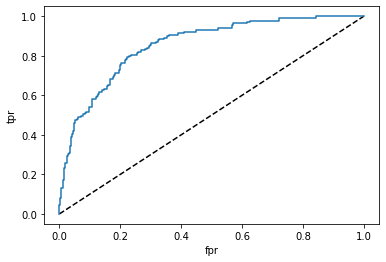

In [50]:
# Reciever Operating Characterestics 

probs=log.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [51]:
metrics.roc_auc_score(y_train,probs) # AUC Area Under the Curve 

0.8551272971260298

In [56]:
new=pd.read_excel("C:\Users\Nikita\Downloads\Train_RiskScore.xlsx")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_50656/1596257746.py, line 1)

In [54]:
new.drop(columns=["ID"],inplace=True)

NameError: name 'new' is not defined

In [ ]:
log.predict_proba(new)[:,1]